# PCA
主成分分析。対象データの次元削減。  
教師なし学習の一つ。  
分散が大きいところが大事(主成分)という考え  
    ばらつきが小さいところはデータに共通するところだからあまり特徴的でない->無視していく

In [1]:
%matplotlib inline
from collections import Counter
from sklearn.utils import shuffle
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

/Users/arakawariku/.pyenv/versions/miniconda3-3.19.0/envs/ml_env/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
mnist = fetch_mldata('MNIST original')
mnist_X, mnist_y = shuffle(mnist.data.astype('float32'),
                           mnist.target.astype('int32'), random_state=42)
mnist_X = mnist_X / 255.0
train_X, test_X, train_y, test_y = train_test_split(mnist_X, mnist_y,
                                                    test_size=0.2,
                                                    random_state=43)

### 主成分分析の可視化


In [3]:
# ラベルが0のデータを抽出する。
zero_index_array = []
for i, y in enumerate(train_y):
    if y == 0:
        zero_index_array.append(i)
print("0の数: ", len(zero_index_array))
sample = train_X[zero_index_array]

0の数:  5534


In [4]:
# scikit-learnのpcaを用いて主成分分析
# 今回は2次元まで削減
pca = PCA(n_components = 2)
pca.fit(sample)
comp_sample = pca.transform(sample)
print("PCA前: ", sample.shape)
print("PCA後: ", comp_sample.shape)
print("主軸ベクトル: ", pca.components_.shape)

inversed_sample = pca.inverse_transform(comp_sample)
print("復元後: ", inversed_sample.shape)

PCA前:  (5534, 784)
PCA後:  (5534, 2)
主軸ベクトル:  (2, 784)
復元後:  (5534, 784)


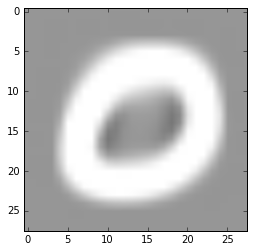

In [5]:
plt.imshow(inversed_sample[0].reshape(28,28),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)

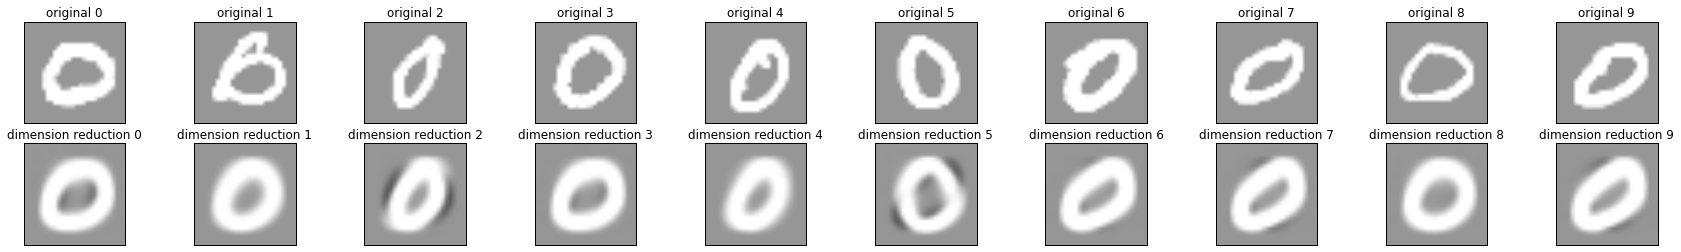

In [6]:
fig, axes = plt.subplots(ncols=10, nrows=2, figsize=(30,4))

for i in range(10):
    axes[0, i].imshow(sample[i,:].reshape(28,28),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)
    axes[0, i].set_title('original %d' % i)
    axes[0, i].get_xaxis().set_visible(False)
    axes[0, i].get_yaxis().set_visible(False)

    axes[1, i].imshow(inversed_sample[i,:].reshape(28,28),vmin=-0.5,vmax=0.5, cmap = cm.Greys_r)
    axes[1, i].set_title('dimension reduction %d' % i)
    axes[1, i].get_xaxis().set_visible(False)
    axes[1, i].get_yaxis().set_visible(False)

元の次元数784を2まで落として復元した。  
個々の些細な特徴は反映されず、「0」が学習されている様子がわかる。